## A large portion of this code is taken from Aurélien Géron's: Hands-On machine learning with SciKit-Learn, Keras and Tensorflow (2nd edition). I have put comments based on information in the book as well as information I found elsewhere.

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [206]:
np.random.seed(42)  # This is done here so we can have consistent results each time we run
                    # any ML code that uses random values.
                    # The Classifier's fit method would not converge for many values of the random seed.
                    # It did converge for random seed 42.
                    # Maybe this needs to be considered as a hyper-parameter?
                    # There are two schools of thought on random seed as a hyperparameter:
                    #   - If you're selecting a seed that gives a better output, then this is overfitting.
                    #     Don't do it - instead keep using the same seed for all your work.
                    #     The seed is only to make sure you can re-create your results.
                    #   - Since the seed can cause model parameters to be very different, use many seeds
                    #     and then use model averaging (bagging, Bayesian methods) to find your final result.

from tensorflow import keras

In [207]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [208]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [209]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Build a Classification MLP using the Sequential API

## One way to create an MLP

In [210]:
model = keras.models.Sequential()    # Creates a stack of layers connected sequentially
model.add(keras.layers.Flatten(input_shape=[28, 28])) # Converts each input image into a 1-D array.
                                                      # Alternatively, use keras.layers.InputLayer with input_shape.
                                                      # It is best to specify the input_shape when creating the model.
                                                      # Without it, you will not be able to do certain things:
                                                      #   - print the model
                                                      #   - save the model
model.add(keras.layers.Dense(300, activation='relu')) # Each dense layer manages:
                                                      #   - Input weights for each neuron
                                                      #   - Bias for each neuron
                                                      # Specifying activation = 'relu' is the same as
                                                      #            activation = keras.activations.relu
                                                      # You can set:
                                                      #   kernel_initializer='random_uniform' to init uniform weights.
                                                      #   bias_initializer=keras.initializers.Constant(0.5)
                                                      #     to initialize constant bias values.
                                                      #     Other initializers: https://keras.io/initializers/
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))  # For binary classification, we would use "sigmoid".

## Alternative way to create an MLP

In [211]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Flatten, Dense
# model = Sequential([
#     Flatten(input_shape=[28, 28]),
#     Dense(300, activation='relu'),
#     Dense(100, activation='relu'),
#     Dense(10, activation='softmax')
# ])

## Back to the original program

In [212]:
model.summary()  # In Output Shape, None means the batch size can be anything.
                 # The Param # for each layer includes the bias value for each neuron.
                 # Be careful - with too many Total params, you may overfit,
                 #   especially when you do not have a lot of training data.

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_52 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_53 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [213]:
model.layers

In [214]:
model.layers[1]

In [215]:
model.layers[1].name

'dense_51'

In [216]:
weights, biases = model.layers[1].get_weights()  # You can see that the dense layer:
                                                 #   - initialized the weights randomly
                                                 #   - set the bias values all to 0
weights

array([[ 0.057469  , -0.01678721, -0.00736749, ..., -0.00252878,
         0.06538878, -0.00966936],
       [-0.04626972, -0.00142857, -0.05427391, ...,  0.0011381 ,
        -0.04439913,  0.0223131 ],
       [-0.06532059,  0.01792243, -0.03307899, ...,  0.07341558,
         0.03253814, -0.07183939],
       ...,
       [ 0.04746229, -0.05565488, -0.00025282, ..., -0.02180268,
        -0.07086326, -0.01104655],
       [ 0.01067265,  0.06198435, -0.00425833, ..., -0.00212046,
        -0.04310563,  0.00859099],
       [-0.0180985 , -0.06538258,  0.05298313, ...,  0.05314462,
        -0.05281673,  0.03887034]], dtype=float32)

In [217]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [218]:
model.compile(loss = 'sparse_categorical_crossentropy',  # Same as loss = keras.losses.sparse_categorical_crossentropy
                                                         #   For each instance we have a target class index from 0-9.
                                                         #   This is why we use sparse_categorical_crossentropy.
                                                         #   If we had multiple target values (ex. one-hot encoded),
                                                         #   we would use "categorical_crossentropy".
                                                         #   For binary classification, 
                                                         #     we would use "binary_crossentropy".
                                                         # Sparse labels -> on-hot encoding: 
                                                         #   Use keras.utils.to_categorical()
                                                         # One-hot encoded -> Sparse labels:
                                                         #   Use np.argmax(labels_array, axis=1)
              optimizer=keras.optimizers.SGD(lr=0.001),          # We could have used optimizer='sgd' here, but that would
                                                         #   mean we want to use the default learning rate of 0.01.
              metrics=['accuracy'])                      # Same as metrics = keras.metrics.sparse_categorical_accuracy
                                                         # We want to measure accuracy since this is a classifier.

In [219]:
history = model.fit(X_train, y_train, epochs=30,         # By default, epochs = 1, so we have to set it.
                    validation_data=(X_valid, y_valid))  # Instead of passing in validation data, we can say
                                                         #   use the last 10% of the training dataset
                                                         #   (before shuffling). Use validation_split=0.1
                                                         # If the training set was skewed with some classes
                                                         #   represented more than others, we can use
                                                         #   class_weight={0: 0.25, 1: 0.75} Pay more attention to
                                                         #   class index 1 since it is under-represented by a third.
                                                         #   To find this sampling:
                                                         #     from sklearn.utils import class_weight
                                                         #     class_weights = class_weight.compute_class_weight(
                                                         #                                     'balanced',
                                                         #                                     np.unique(y_train),
                                                         #                                     y_train)
                                                         # If some of your samples are better (maybe labeled
                                                         #   by experts), compared to others, pass a list of
                                                         #   sample weights (same length as the # of instances).
                                                         #   You can also provide sample weights to the validation
                                                         #   set by adding them to the validation_data as the third
                                                         #   value in the tuple.

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 98us/sample - loss: 2.1621 - accuracy: 0.7027 - val_loss: 0.6624 - val_accuracy: 0.7598
Epoch 2/30
55000/55000 [==============================] - 5s 88us/sample - loss: 0.5840 - accuracy: 0.7860 - val_loss: 0.5943 - val_accuracy: 0.7984
Epoch 3/30
55000/55000 [==============================] - 5s 89us/sample - loss: 0.5049 - accuracy: 0.8148 - val_loss: 0.5334 - val_accuracy: 0.8240
Epoch 4/30
55000/55000 [==============================] - 5s 88us/sample - loss: 0.4622 - accuracy: 0.8291 - val_loss: 0.5091 - val_accuracy: 0.8258
Epoch 5/30
55000/55000 [==============================] - 5s 91us/sample - loss: 0.4340 - accuracy: 0.8393 - val_loss: 0.4997 - val_accuracy: 0.8288
Epoch 6/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.4127 - accuracy: 0.8458 - val_loss: 0.4802 - val_accuracy: 0.8330
Epoch 7/30
55000/55000 [==============================] -

In [220]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [221]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [222]:
history.history

{'loss': [2.162139022350311,
  0.5840167275428771,
  0.5048508872465653,
  0.46219165714654054,
  0.4339931011091579,
  0.41274737987735055,
  0.39504679873423143,
  0.3826265826160258,
  0.3713308097015728,
  0.36228909733078696,
  0.3535643539320339,
  0.3460861026915637,
  0.3397694885925813,
  0.3334482579231262,
  0.32765743474526837,
  0.3219052223552357,
  0.31676690770496024,
  0.31249537050073795,
  0.30726795122623446,
  0.30382607377875936,
  0.2992165064096451,
  0.29535730360854756,
  0.29255958927327935,
  0.2886682654619217,
  0.28435337323925713,
  0.2809089149106633,
  0.2793443668820641,
  0.2765254691031846,
  0.2731004995866255,
  0.2711230155814778],
 'accuracy': [0.7026727,
  0.786,
  0.8148364,
  0.82912725,
  0.83927274,
  0.84583634,
  0.85114545,
  0.8560727,
  0.8606,
  0.86367273,
  0.8664182,
  0.8692182,
  0.87174547,
  0.87325454,
  0.8766909,
  0.87825453,
  0.8805091,
  0.8832,
  0.8832545,
  0.8850909,
  0.88725454,
  0.88798183,
  0.8894,
  0.8901273,

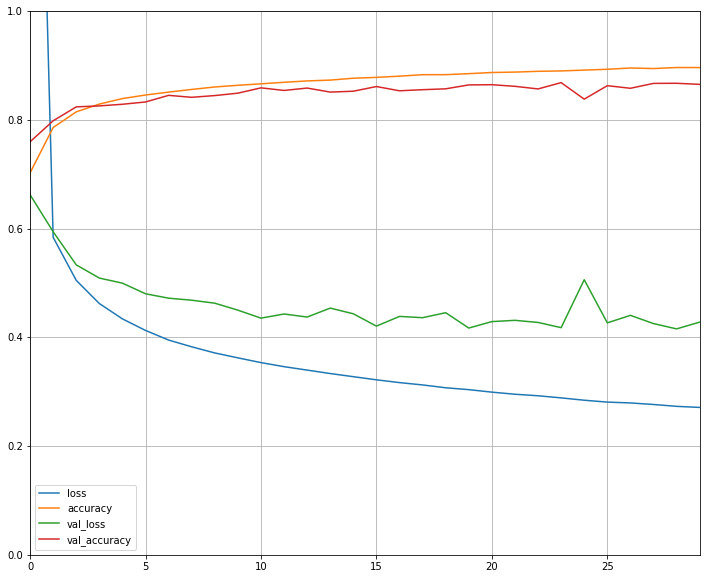

In [223]:
pd.DataFrame(history.history).plot(figsize=(12, 10))  # Ideally, we would like to see decreasing loss values
                                                      # and increasing accuracy.
                                                      # Since the ML libraries use random numbers, it can result
                                                      # in different output.
                                                      # We can tell if the model has converged based on the error curves.
                                                      # The validation error is computed at the end of each epoch,
                                                      # and the training error is computed during each epoch.
                                                      # This is why the training curve should be shifted half an epoch
                                                      # to the left.
                                                      # If you want to continue training, call the fit() method again.
                                                      # It will continue where it left off.
                                                      # Tuning:
                                                      #   Tune the learning rate first.
                                                      #   Then try another optimizer.
                                                      #   Tune each hyperparameter. For each hyperparameter, retune
                                                      #     the learning rate.
                                                      #   Then try tuning the model parameters:
                                                      #     - Number of layers
                                                      #     - Neurons per layer
                                                      #     - Activation functions per layer
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [231]:
loss_value, metrics = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [232]:
loss_value, metrics

(0.4641527450919151, 0.855)

In [240]:
X_new, y_new = X_test[:3], y_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.01, 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [241]:
y_pred = model.predict_classes(X_new)
y_pred, y_new

(array([9, 2, 1]), array([9, 2, 1], dtype=uint8))

In [239]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Build a Regression MLP using the Sequential API

## Sidebar - argmax(d, axis=0). Here axis=0 means across all rows (or Along each column).

In [224]:
d = np.array([[0, 1, 0], [1, 0, 0]])
d

array([[0, 1, 0],
       [1, 0, 0]])

In [225]:
np.argmax(d, axis=0)  # Here axis=0 means across all rows (or along each column)

array([1, 0, 0])

In [226]:
d.shape

(2, 3)